In [1]:
import pandas as pd

df = pd.read_excel('data_penumpang_kapal.xlsx')
df.head()

,tanggal,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,2021-01-01,MUARA ANGKE,16,19,896,1276
1,2021-01-01,HARAPAN,6,2,561,18
2,2021-01-01,KELAPA,2,4,101,96
3,2021-01-01,LANCANG,6,6,93,141
4,2021-01-01,MARINA,3,2,213,121


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tanggal          3650 non-null   datetime64[ns]
 1   pelabuhan        3650 non-null   object        
 2   kapal_berangkat  3650 non-null   int64         
 3   kapal_tiba       3650 non-null   int64         
 4   penumpang_naik   3650 non-null   int64         
 5   penumpang_turun  3650 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 171.2+ KB


In [3]:
df.shape

(3650, 6)

In [4]:
df.describe()

,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,4.432055,4.524932,68.438630,67.807945
std,3.630873,3.865307,129.588954,125.791441
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,11.000000
50%,4.000000,4.000000,35.000000,36.000000
75%,6.000000,6.000000,72.000000,77.000000
max,64.000000,64.000000,2172.000000,2347.000000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
null_data = round(100*(df.isnull().sum())/len(df), 2)
null_data

tanggal            0.0
pelabuhan          0.0
kapal_berangkat    0.0
kapal_tiba         0.0
penumpang_naik     0.0
penumpang_turun    0.0
dtype: float64

In [7]:
total_kb = df.groupby('pelabuhan')['kapal_berangkat'].sum()
total_kb = total_kb.reset_index()
total_kb.head()

,pelabuhan,kapal_berangkat
0,HARAPAN,486
1,KELAPA,1093
2,LANCANG,2082
3,MARINA,915
4,MUARA ANGKE,2325


In [8]:
total_kt = df.groupby('pelabuhan')['kapal_tiba'].sum()
total_kt = total_kt.reset_index()
total_kt.columns = ['pelabuhan', 'kapal_tiba']
total_kt.head()

,pelabuhan,kapal_tiba
0,HARAPAN,551
1,KELAPA,1139
2,LANCANG,2066
3,MARINA,930
4,MUARA ANGKE,2364


In [10]:
total_pn = df.groupby('pelabuhan')['penumpang_naik'].sum()
total_pn = total_pn.reset_index()
total_pn.columns = ['pelabuhan', 'penumpang_naik']
total_pn.head()

,pelabuhan,penumpang_naik
0,HARAPAN,13440
1,KELAPA,15209
2,LANCANG,18414
3,MARINA,11941
4,MUARA ANGKE,77193


In [11]:
total_pt = df.groupby('pelabuhan')['penumpang_turun'].sum()
total_pt = total_pt.reset_index()
total_pt.columns = ['pelabuhan', 'penumpang_turun']
total_pt.head()

,pelabuhan,penumpang_turun
0,HARAPAN,12702
1,KELAPA,20280
2,LANCANG,13886
3,MARINA,12870
4,MUARA ANGKE,68479


In [12]:
merge1 = pd.merge(total_kb, total_kt, on='pelabuhan', how='inner')
merge2 = pd.merge(merge1, total_pn, on='pelabuhan', how='inner')
data_fix = pd.merge(merge2, total_pt, on='pelabuhan', how='inner')
data_fix

,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun
0,HARAPAN,486,551,13440,12702
1,KELAPA,1093,1139,15209,20280
2,LANCANG,2082,2066,18414,13886
3,MARINA,915,930,11941,12870
4,MUARA ANGKE,2325,2364,77193,68479
5,PARI,2077,2093,28476,28232
6,PRAMUKA,1807,1935,31104,33795
7,SABIRA,198,206,2141,2100
8,TIDUNG,1769,1807,17590,20844
9,UNTUNG JAWA,3425,3425,34293,34311


In [13]:
data_df = data_fix[['kapal_berangkat', 'kapal_tiba', 'penumpang_naik', 'penumpang_turun']]
scaler = StandardScaler()
data_df_scaled = scaler.fit_transform(data_df)
data_df_scaled.shape

(10, 4)

In [14]:
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(data_df_scaled)

KMeans(max_iter=50, n_clusters=2)

In [15]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

In [16]:
data_fix['Cluster'] = kmeans.labels_
data_fix

,pelabuhan,kapal_berangkat,kapal_tiba,penumpang_naik,penumpang_turun,Cluster
0,HARAPAN,486,551,13440,12702,0
1,KELAPA,1093,1139,15209,20280,0
2,LANCANG,2082,2066,18414,13886,0
3,MARINA,915,930,11941,12870,0
4,MUARA ANGKE,2325,2364,77193,68479,1
5,PARI,2077,2093,28476,28232,1
6,PRAMUKA,1807,1935,31104,33795,1
7,SABIRA,198,206,2141,2100,0
8,TIDUNG,1769,1807,17590,20844,0
9,UNTUNG JAWA,3425,3425,34293,34311,1


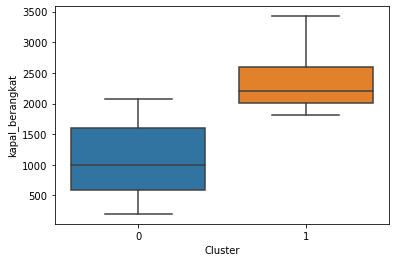

In [17]:
sns.boxplot(x='Cluster', y='kapal_berangkat', data=data_fix)

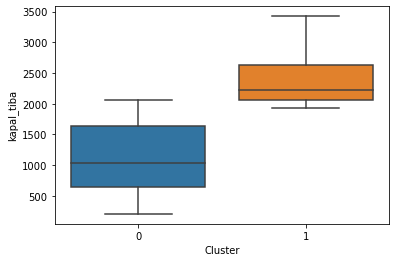

In [18]:
sns.boxplot(x='Cluster', y='kapal_tiba', data=data_fix)

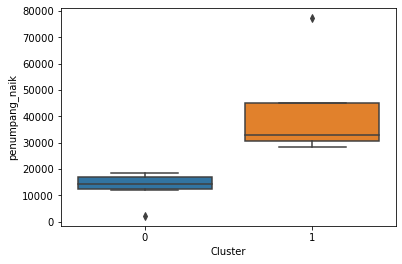

In [19]:
sns.boxplot(x='Cluster', y='penumpang_naik', data=data_fix)

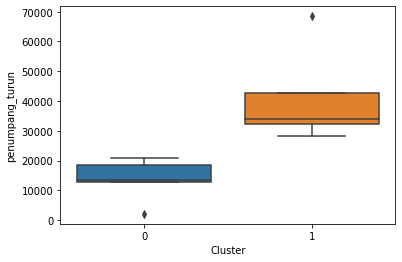

In [20]:
sns.boxplot(x='Cluster', y='penumpang_turun', data=data_fix)

In [21]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.35684106603739146
For n_clusters = 3 The average silhouette_score is : 0.4334110152344558
For n_clusters = 4 The average silhouette_score is : 0.43451318059102795


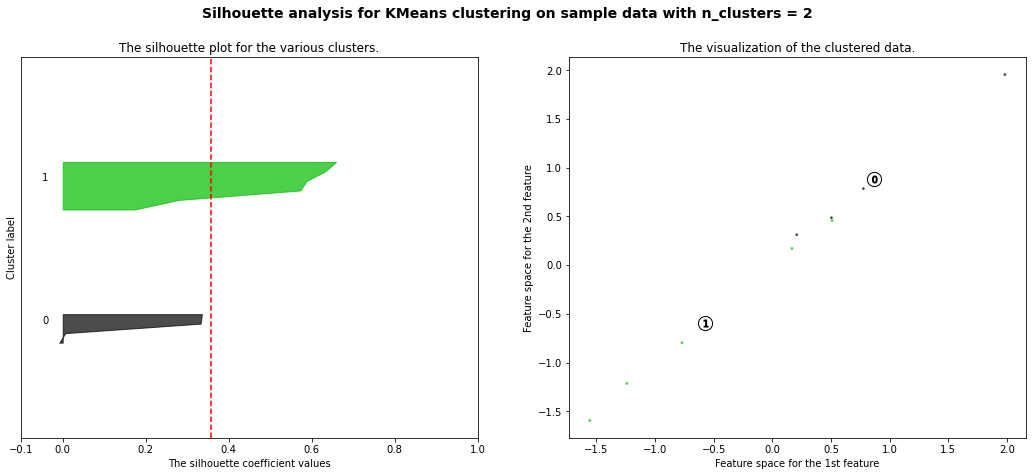

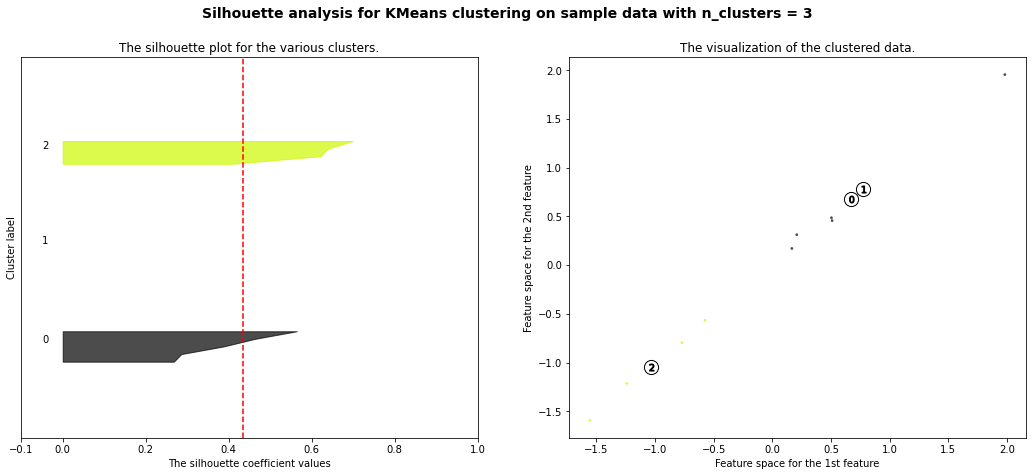

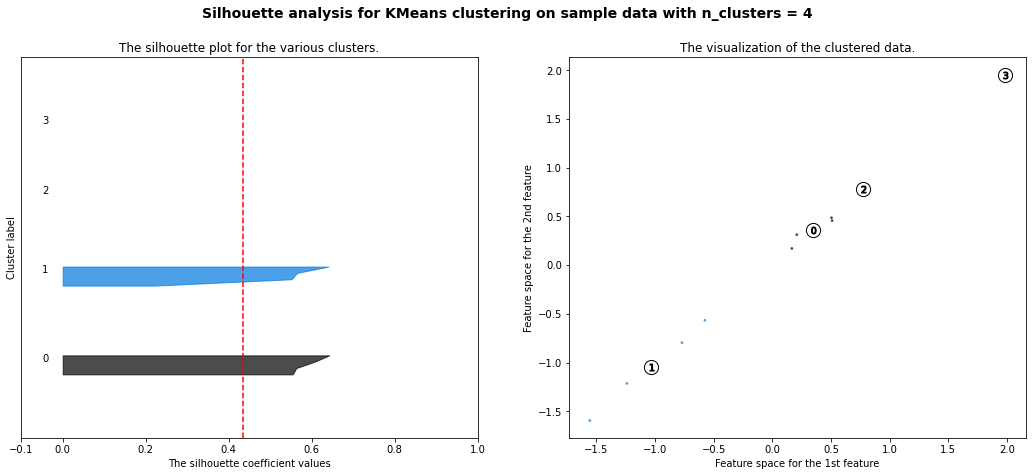

In [22]:
n_cluster = [2, 3, 4]

for n in n_cluster:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_df_scaled) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(data_df_scaled)

    silhouette_avg = silhouette_score(data_df_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(data_df_scaled, cluster_labels)

    y_lower = 10
    for i in range (n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(
        data_df_scaled[:, 0], data_df_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()




In [23]:
#make week of year column
data_fix['week'] = data_fix['tanggal'].dt.week % 53 + 1

#make month column
data_fix['month'] = data_fix['tanggal'].dt.month

#make total penumpang
data_fix['total_penumpang'] = data_fix['penumpang_naik'] + data_fix['penumpang_turun']
data_fix

KeyError: 'tanggal'

In [24]:
#describe total penumpang
data_fix['total_penumpang'].describe()

KeyError: 'total_penumpang'

In [25]:
#define high, normal, and low total penumpang
data_fix['season'] = data_fix['total_penumpang'].apply(lambda x: 'high' if x > 1438 else ('normal' if x > 1011 else 'low'))

KeyError: 'total_penumpang'

In [26]:
#conclusion of week season most frequent
week_rec = data_fix.groupby('week')['season'].agg(pd.Series.mode)

#conclusion of month season most frequent
month_rec = data_fix.groupby('month')['season'].agg(pd.Series.mode)

#conclusion of day season most frequent
day_rec = data_fix.groupby('tanggal')['season'].agg(pd.Series.mode)


KeyError: 'week'

In [27]:
day_rec

NameError: name 'day_rec' is not defined

In [28]:
#function to predict season
import datetime as dt
def predict_season(day, month):
    #dayand month to week
    datetimenya = dt.date(2021, month, day)
    dayofyear = datetimenya.timetuple().tm_yday-1
    week = datetimenya.isocalendar()[1]
    #get season
    season = []
    try:
        season.append(day_rec[dayofyear])
    except:
        pass
    try:
        season.append(week_rec[week])
    except:
        pass
    try:
        season.append(month_rec[month])
    except:
        pass
    #list to numpy
    season = np.array(season, dtype=object)
    #make array to 1 dimension array
    for i in season:
        if type(i) == np.ndarray:
            #append to season
            season = np.append(season, i)

    #remove nonstring value
    cleaned = []
    for i in season:
        if type(i) == str:
            cleaned.append(i)
    
    #get most frequent
    from collections import Counter
    return Counter(cleaned).most_common(1)[0][0]  

In [29]:
#predict season
predict_season(3, 12)

IndexError: list index out of range